# testing loading and reading of the census csv/geojson

In [13]:
import geojson
import csv

In [4]:
regions = geojson.loads(open("./data/geos.geojson").read())

In [49]:
geo_data = {}
all_points = []
all_points_weights = []
for region in regions.features:
    long,lat = region.geometry.coordinates[0][0][0]
    id = region.properties["id"] 
    population = region.properties["pop"]
    geo_data[id] = (lat, long)
    all_points.append((lat, long))
    all_points_weights.append(int(population))

In [51]:
senior_population_points = []
with open("./data/amount_over_65.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        id = row["GeoUID"]
        population = row["Population "]
        senior_population = row["v_CA21_251: 65 years and over"]
        # print(id, geo_data[id], population, senior_population)
        if int(senior_population) / int(population) > 0.4:
            weight = 1 + int(population) // 100 
            senior_population_points.append([weight, geo_data[id]])

In [52]:
len(senior_population_points)

20

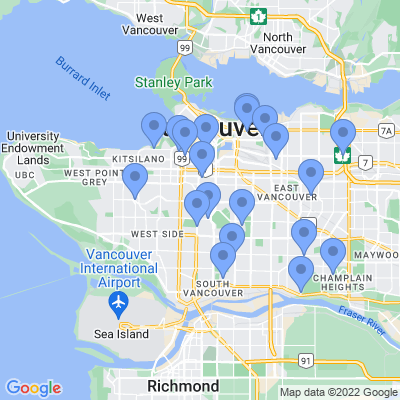

In [41]:
import utils
display(utils.get_map((49.249828, -123.125774), [("blue", [p for _, p in senior_population_points])], zoom=11))

[(49.272701, -123.102919), (49.208536, -123.134384), (49.254408, -123.075971), (49.250674, -123.044153), (49.232245, -123.024839), (49.217116, -123.090978), (49.248867, -123.060477), (49.269543, -123.056609), (49.222106, -123.159194), (49.232245, -123.024839)]


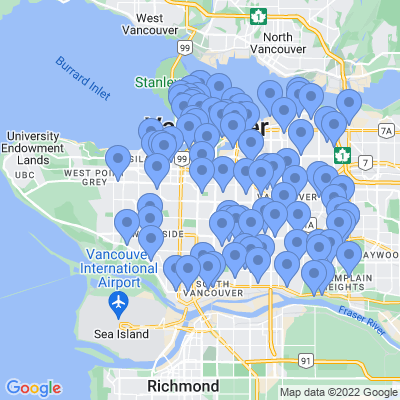

In [55]:
import random
sample = [random.choices(all_points, weights=all_points_weights)[0] for _ in range(100)]
print(sample[:10])
display(utils.get_map((49.249828, -123.125774), [("blue", sample)], zoom=11))